#### 特征清洗
##### 缺失值处理

Univariate feature imputation：填补特征的缺失值的时候只使用此特征其他的非缺失值；Multivariate imputation：使用所有可用的特征却估计缺失值。

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer

###### 填补：均值，中位数，众数

In [7]:
'''# Missing values can be imputed with a provided constant value,or using 
the statistics of each column in which the missing values are located. 
This class also allows for different missing values encodings(np.nan,-1...).''' 
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# strategy:mean, median, most_frequent, constant
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
X = [[np.nan, 2], [6, np.nan], [7, 6]]
imp.transform(X)

array([[4.        , 2.        ],
       [6.        , 3.66666667],
       [7.        , 6.        ]])

In [5]:
df = pd.DataFrame([["a", "x"],[np.nan, "y"],["a", np.nan],
                   ["b", "y"]])
'''supports categorical data represented as string values or 
pandas categoricals when using the 'most_frequent' or 'constant' strategy'''
imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


###### 使用算法填补

###### 生成缺失索引

In [12]:
'''transform a dataset into corresponding binary matrix 
indicating the presence of missing values in the dataset.'''
X = np.array([[-1, -1, 1, 3],
              [4, -1, 0, -1],
              [8, -1, 1, 0]])
indicator = MissingIndicator(missing_values=-1,features='all')
indicator.fit(X)
indicator.transform(X)

array([[ True,  True, False, False],
       [False,  True, False,  True],
       [False,  True, False, False]])

#### 特征预处理
##### 归一化/标准化

In [16]:
from sklearn import preprocessing

######  z-score

In [20]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.transform([[-1., 1., 0.]])

array([[-2.44948974,  1.22474487, -0.26726124]])

###### Min-Max

`MinMaxScaler` and `MaxAbsScaler` The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

`MaxAbsScaler` 适合稀疏数据，不会破坏数据的稀疏性

In [22]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit_transform(X_train)

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

###### Scaling with outlier

removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).

In [23]:
X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]
transformer = preprocessing.RobustScaler().fit(X)
transformer.transform(X)

array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

###### 标准化
This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

In [28]:
X = np.array([[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]])
X_normalized = preprocessing.Normalizer(norm='l2')
X_normalized.fit(X)
X_normalized.transform([[-1.,  1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

##### 特征编码

###### 自然数编码

In [ ]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari']])

###### One-Hot

In [ ]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

##### 数据离散化

In [ ]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
'''strategy参数控制分箱的方式,uniform:等宽，quantile:等频, kmeans:
defines bins based on a k-means clustering procedure performed on
each feature independently.'''
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], 
                                     encode='ordinal').fit(X)
est.transform(X)

###### 二值化

In [ ]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

binarizer = preprocessing.Binarizer(threshold=1).fit(X)
binarizer.transform(X)

#### 特征构造
##### 非线性变换

###### Quantile transforms

Quantile transforms put all features into the same desired distribution based on the formula $G^{-1}(F(X))$.  where $F$ is the cumulative distribution function of the feature and $G^{-1}$ the desired output distribution .

In [37]:
X = np.array([[1, 2, 3, 4],
              [4, -1, 0, -1],
              [8, -1, 1, 0]]).T
#setting output_distribution='normal'.
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=4,
                                                         random_state=0)
X_train_trans = quantile_transformer.fit(X)
quantile_transformer.transform(X)

array([[0.        , 1.        , 1.        ],
       [0.33333333, 0.        , 0.        ],
       [0.66666667, 0.66666667, 0.66666667],
       [1.        , 0.        , 0.33333333]])

######  Power transforms 

 a family of parametric, monotonic transformations that aim to map data from any distribution to as close to a Gaussian distribution as possible in order to stabilize variance and minimize skewness.

In [ ]:
# method:'yeo-johnson','box-cox'
pt = preprocessing.PowerTransformer(method='box-cox', 
                                    standardize=False)
X_lognormal = np.random.RandomState(616).lognormal(
    size=(3, 3))
pt.fit_transform(X_lognormal)

##### Polynomial features

In [41]:
X = np.arange(6).reshape(3, 2)
'''The features of X have been transformed from 
 (X1,X2) to (1,X1,X2,X1^2,X2^2,X1X2) '''
'''interaction_only=True:from (X1,X2) to (1,X1,X2,X1X2)'''
poly = preprocessing.PolynomialFeatures(interaction_only=True,
                                        degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

#### 特征选择
##### 去除方差较小的特征

removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [44]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
selector = VarianceThreshold(threshold=(.8 * (1 - .8)))
selector.fit(X)
selector.transform([[1,2,1]])

array([[2, 1]])

##### 过滤式
Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. 
- `SelectKBest` removes all but the  highest scoring features
- `SelectPercentile` removes all but a user-specified highest scoring percentage of features
- `GenericUnivariateSelect` allows to perform univariate feature selection with a configurable strategy.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelBinarizer
X, y = load_iris(return_X_y=True)
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.get_support()

X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
#mode:{‘percentile’, ‘k_best’, ‘fpr’, ‘fdr’, ‘fwe’}
transformer = GenericUnivariateSelect(chi2, mode='k_best', param=20)
X_new = transformer.fit_transform(X, y)

##### 包裹式
First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.

In [12]:
import sklearn.feature_selection as fs
from sklearn.svm import SVC
estimator = SVC(kernel="linear")
selector = fs.RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_#The mask of selected features.
selector.ranking_#  Selected features are assigned rank 1.

estimator = SVC(kernel="linear")
selector = fs.RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)

##### Select From Model

The features are considered unimportant and removed, if the corresponding coef_ or feature_importances_ values are below the provided threshold parameter. 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

##### 特征降维

explained variance ratio: [0.92461872 0.05306648 0.01710261 0.00521218]


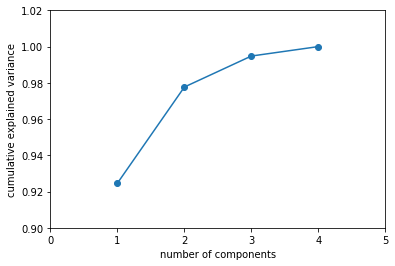

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
data = sns.load_dataset('iris')
values = data.iloc[:, :4] 
pca = PCA(n_components=4) #选取4个主成分
pc = pca.fit_transform(values) #对原数据进行pca处理
print("explained variance ratio: %s" % pca.explained_variance_ratio_) #输出各个主成分所占的比例
plt.plot(range(1, 5), np.cumsum(pca.explained_variance_ratio_)) #绘制主成分累积比例图
plt.scatter(range(1,5),np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 5)
plt.ylim(0.9, 1.02)
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance");
#pca1 = PCA(n_components=2)
#pc1 = pca1.fit_transform(values) 
#pc1_df = pd.DataFrame(pc1, columns=['pc_1', 'pc_2'])